![](img/logo-alura.svg)
<br><br>
    
## Estatística com Python parte 1: Frequências e Medidas

- Nível: Básico 
- Aluno: Paulo Freitas Nobrega 
- Professor: Rodrigo Fernando Dias 
- Link do curso: https://cursos.alura.com.br/course/estatistica-distribuicoes-e-medidas
<br><br>

##### Dataset: Pesquisa Nacional por Amostra de Domicílios (PNAD) 2015
> O sistema de pesquisas domiciliares, implantado progressivamente no Brasil a partir de 1967, com a criação da **Pesquisa Nacional por Amostra de Domicílios - PNAD**, produz informações básicas para o estudo do desenvolvimento socioeconômico do País.

<br>

### Aula 04: Medidas separatrizes
As medidas separatrizes ou de ordenamento são: `quartis`, `decis` e `percentis`. Os quartis ($Q_1$, $Q_2$ e $Q_3$), como o próprio nome sugere, divide a distribuição dos dados ordenados em quatro partes, sendo, $Q_1$ o quartil que separa os 25% valores inferiores dos 75% superiores, $Q_2$ o que divide o conjunto ao meio (é a mediana) e $Q_3$ o que separa os 75% valores inferiores dos 25% superiores. Os decis, por sua vez, dividem a distribuição dos dados em 10 partes ($D_i, i=1,2,…,9$) e os percentis dividem a distribuição em 100 partes ($P_i=1,2,…,99$).

> Não há um consenso universal sobre um procedimento único para o cálculo das medidas separatrizes, e diferentes calculadoras e softwares estatísticos podem produzir resultados ligeiramente diferentes.

---
FERREIRA, Valéria. **Estatística básica**. p. 76. São Paulo: SESES, 2015.

### Fórmulas e conceitos estatísticos para esta aula.

Outliers: Valor que seja muito distante dos valores em um conjunto de dados.

$n$ = Número de elementos da amostra/população

$Q1, Q2, Q3$ = Quartis. Onde $Q2$ refere-se a mediana do conjunto de dados.

$IQR$ = Distância interquartílica (ou amplitude interquantil). Onde: $IQR = Q3 - Q1$

$D$ = Decil. Sendo: $D_i = \frac{i n}{10}$. Onde: $i = 1,2,...,9$

$P$ = Percentil. Onde: $0 < P < 1$ Sendo: $P_i = \frac{i n}{100}$. Onde: $i = 1,2,...,99$

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as misc
import matplotlib.pyplot as plt

# Aplicando Estilo Matplotlib
plt.style.use('seaborn')

# Importando Dataset PNAD
df_pnad = pd.read_csv('dados_pnad.csv')

In [2]:
# Exibindo dados do Dataset PNAD
df_pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Quartil

Os quartis dividem um conjunto de dados em quatro partes iguais. Os quartis, são portanto, três: 

- $Q1$: `o primeiro quartil` 
- $Q2$: `o segundo quartil` (que é a mediana) 
- $Q3$: `o terceiro quartil`

Para obter os quartis:

1. Organize o conjunto de dados em ordem crescente;
2. `Q2`: Encontre a mediana do conjunto de dados. Este é o segundo quartil.
3. `Q1`: Tome o conjunto de dados à esquerda da mediana; O primeiro quartil é a mediana do novo conjunto de dados.
4. `Q3`: Tome o conjunto de dados à direita da mediana; O terceiro quartil é a mediana do novo conjunto de dados.

> Pode-se entender os quartis como `divisores`. Da mesma forma que para se dividir um conjunto de dados em duas partes utiliza-se um único divisor - a mediana. Para obter-se quatro partes iguais de um conjunto de dados utiliza-se três divisores 25%, 50% e 75% - Q1, Q2 e Q3.

---
VIEIRA, Sonia. **Estatística básica**. 2 ed. p. 61, 62, 63. São Paulo: CENGAGE, 2018.

In [3]:
# Quartis de renda PNAD utilizando a função quantile do Pandas
divisores = [.25, .5, .75]
df_pnad['Renda'].quantile(divisores)

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [4]:
# Criando uma função quartil
# Função Mediana
def mediana(conjunto: list) -> float:
    """Calcula a mediana de um conjunto de dados"""  
    c, n = sorted(conjunto), len(conjunto)
    meio = n//2
    
    return c[meio] if (n%2 > 0) else (c[meio-1] + c[meio]) / 2


# Função quartil
def quartil(conjunto: list) -> list:
    """Calcula os quartis de um conjunto de dados"""
    c, n = sorted(conjunto), len(conjunto)
    
    q2 = mediana(c)
    q1 = mediana([k for _,k in enumerate(c) if k < q2])
    q3 = mediana([k for _,k in enumerate(c) if k > q2])
    
    return [q1, q2, q3]

In [5]:
# Testando a função quartil com dados de renda PNAD
conjunto = df_pnad['Renda'].values
quartil(conjunto)

[788, 1200.0, 2100]

##### Outra maneira de encontrar os quartis (Pouco usual)

O primeiro quartil `Q1` será a observação que ocupar a posição $\frac{n}{4}$. O segundo quartil `Q2` será a observação que ocupar a posição $\frac{2n}{4}$ e o terceiro quartil `Q3` será a observação que ocupar a posição $\frac{3n}{4}$. Quando fazemos estas divisões para encontrar as posições dos quartis, pode acontecer do resultado ser um número inteiro ou um número fracionário. Então, adotaremos a seguinte convenção:

- Se a divisão resultar num número fracionário, arredonde-o para cima e o valor do quartil será a observação encontrada nesta posição.
- Se a divisão for um número inteiro, o quartil será a média aritmética da observação que ocupar a posição encontrada com a observação que ocupar a posição imediatamente seguinte.

<br>

---
FERREIRA, Valéria. **Estatística básica**. p. 75. São Paulo: SESES, 2015.

In [6]:
# Criando uma função quartil (pouco usual)
# Função quartil2
def quartil2(conjunto: list) -> list:
    """Calcula os quartis de um conjunto de dados"""
    c, n = sorted(conjunto), len(conjunto)
    
    # verificar francionario
    fracionario = lambda x: True if x%2 > 0 else False
    
    # media aritimetica
    media = lambda i: (c[i] + c[i+1])/2
    
    # convertendo
    convert = lambda q: c[int(q)] if fracionario(q) else media(int(q)-1)    

    return [convert(q) for q in (n/4, 2*n/4, 3*n/4)]

In [7]:
# Testando a função quartil2 com dados de renda PNAD
conjunto = df_pnad['Renda'].values
quartil2(conjunto)

[788.0, 1200.0, 2000.0]

##### Decis e Percentis

O `Decil` será a observação que ocupar a posição $D_i$.<br> 
E o `Percentil` será a observação que ocupar a posição $P_i$.

$D_i = \frac{i n}{10}$. Onde: $i = 1,2,...,9$

<br>

$P_i = \frac{i n}{100}$. Onde: $i = 1,2,...,99$

<br>

É possível adotar a conversão convenção:

- Se a divisão resultar num número fracionário, arredonde-o para cima e o valor do quartil será a observação encontrada nesta posição.
- Se a divisão for um número inteiro, o quartil será a média aritmética da observação que ocupar a posição encontrada com a observação que ocupar a posição imediatamente seguinte.

---
FERREIRA, Valéria. **Estatística básica**. p. 77. São Paulo: SESES, 2015.

In [8]:
# Decis de renda PNAD utilizando a função quantile do Pandas
divisores = [i/10 for i in range(1,10)]
df_pnad['Renda'].quantile(divisores)

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [9]:
# Criando uma função melhorada quartil
def quartil(conjunto: list, percentis: list) -> list:
    """Calcula os decis de um conjunto de dados"""
    c, n = sorted(conjunto), len(conjunto)
    
    fracionario = lambda x: True if x%2 > 0 else False
    media = lambda i: (c[i] + c[i+1])/2
    convert = lambda p: c[int(p)] if fracionario(p) else media(int(p)-1)    

    return { p: convert(p*n) for p in percentis }
    

In [10]:
# Quartis (25% em 25%)
c, p = df_pnad['Renda'].values, [.25, .5, .75]
quartil(c, p)

{0.25: 788.0, 0.5: 1200.0, 0.75: 2000.0}

In [11]:
# Decis (10% em 10%)
c, p = df_pnad['Renda'].values, [i/10 for i in range(1, 10)]
quartil(c, p)

{0.1: 350.0,
 0.2: 788.0,
 0.3: 800.0,
 0.4: 1000.0,
 0.5: 1200.0,
 0.6: 1500.0,
 0.7: 1900.0,
 0.8: 2500.0,
 0.9: 4000.0}

In [12]:
# Percentis (1% em 1%)
c, p = df_pnad['Renda'].values, [i/100 for i in range(1, 100)]
pd.Series(quartil(c, p)).head(10)

0.01      0.0
0.02      0.0
0.03      0.0
0.04     50.0
0.05    100.0
0.06    180.0
0.07    200.0
0.08    280.0
0.09    300.0
0.10    350.0
dtype: float64

### BoxPlot

Os boxplots, apresentados por Tukey (Tukey, 1977), são baseados em percentis e são um modo rápido de visualizar a distribuição dos dados. 

As partes superior e inferior da caixa são o 75º e o 25º percentis, respectivamente. A mediana (50º percentil) é mostrada pela linha horizontal na caixa. As linhas pontilhadas, chamadas de `whiskers`, se estendem do topo e da base para indicar a variação da massa de dados. Por predefinição, a função estende os whiskers até o ponto mais longe além da caixa, porém não vai além de 1.5 vez o `IQR` (Distância interquartílica ou amplitude interquantil). Quaisquer dados fora da whiskers são representados como pontos únicos (esses dados são candidatos a outliers).

<br>

![](img/0002.jpg)

<br>

---
BRUCE, Peter. **Estatística Prática para Cientistas de Dados**: 50 Conceitos Essenciais. 1. ed. p. 21, 22. Rio de Janeiro: Alta Books, 2019.

VIEIRA, Sonia. **Estatística básica**. 2 ed. p. 61, 62, 63. São Paulo: CENGAGE, 2018.

Text(0.5, 1.0, 'Anos de Estudo por Sexo')

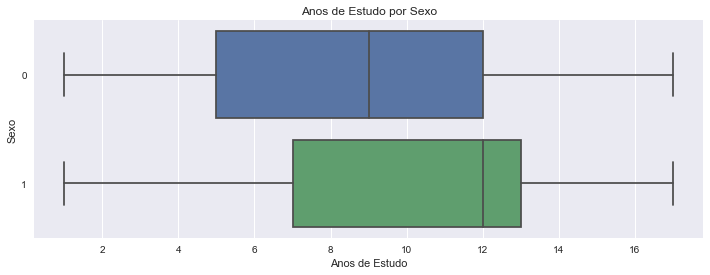

In [13]:
# Comparação de boxplot com Seaborn
ax_estudo = sns.boxplot(data=df_pnad, 
                        x='Anos de Estudo',
                        y='Sexo',
                        orient='h')
ax_estudo.figure.set_size_inches(12, 4)
ax_estudo.set_title('Anos de Estudo por Sexo')

Text(0.5, 0, 'Renda')

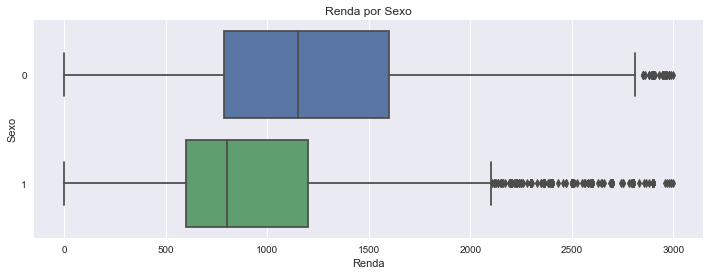

In [14]:
# Comparação de boxplot com Seaborn
df_renda = df_pnad.query('Renda < 3000')
ax_renda = sns.boxplot(data=df_renda, 
                        x='Renda',
                        y='Sexo',
                        orient='h')
ax_renda.figure.set_size_inches(12, 4)
ax_renda.set_title('Renda por Sexo')
ax_renda.set_xlabel('Renda')

In [15]:
# Criando uma função boxplot fake
def boxplot(conjunto: list) -> dict:
    """Calcula as métricas para criação do boxplot"""
    c, n = sorted(conjunto), len(conjunto)    
    
    quartis = quartil(conjunto, [.25, .5, .75])
    iqr = (quartis[0.75] - quartis[0.25])
    
    return {
        'min': quartis[0.25] - 1.5*iqr,
        'Q1': quartis[0.25],
        'Q2': quartis[0.50],
        'Q3': quartis[0.75],
        'max': quartis[0.75] + 1.5*iqr
    }

In [16]:
# Observando os dados retornados pela função boxplot
boxplot(df_pnad['Altura'])

{'min': 1.48486883225,
 'Q1': 1.645785188,
 'Q2': 1.6993247325,
 'Q3': 1.7530627585,
 'max': 1.91397911425}

Text(0.5, 0, 'Metros')

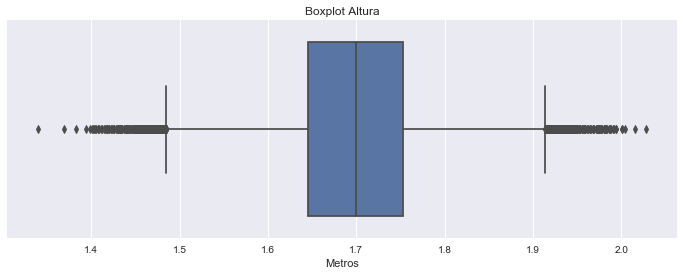

In [17]:
# Boxplot com Seaborn para confrontar os dados acima
ax_altura = sns.boxplot(data=df_pnad, 
                        x='Altura',
                        orient='h')
ax_altura.figure.set_size_inches(12, 4)
ax_altura.set_title('Boxplot Altura')
ax_altura.set_xlabel('Metros')